In [239]:
import pandas as pd
import numpy as np
complete_listings = pd.read_csv("listings.csv")

complete_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,https://www.airbnb.com/rooms/653494030951422457,20220924142144,2022-09-25,previous scrape,Top-floor Villa Apartment in the Heart of Hell...,Family apartment located on the 1st floor of a...,The apartment is located one block from Strand...,https://a0.muscache.com/pictures/miso/Hosting-...,465189427,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
13811,647809303952891559,https://www.airbnb.com/rooms/647809303952891559,20220924142144,2022-09-25,previous scrape,Dejligt lille hus med flere hyggekroge ude og ...,Lille villa i roligt kvarter 15 min fra Københ...,"Nice green areas, football field, lake, playgr...",https://a0.muscache.com/pictures/b466ccb0-cef0...,4862421,...,5.00,4.67,5.00,NaN,f,1,1,0,0,1.01
13812,650819220455514228,https://www.airbnb.com/rooms/650819220455514228,20220924142144,2022-09-25,previous scrape,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,"Smuk og hyggelig lejlighed tæt på Hvidovre st,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,134647873,...,5.00,4.67,5.00,NaN,t,1,1,0,0,1.27
13813,658612163688161695,https://www.airbnb.com/rooms/658612163688161695,20220924142144,2022-09-25,previous scrape,Cosy apartment with a great view in Copenhagen,Well located apartment close to grocery stores...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,256903668,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


## Point 1

In [240]:
relevant_listings = complete_listings[[
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed', 
    'latitude',
    'longitude',
    'room_type',  
    'price',
    'minimum_nights',
    'number_of_reviews',  
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',  
    'review_scores_checkin',
    'review_scores_communication',  
    'review_scores_location',  
    'review_scores_value',  
    'reviews_per_month',
    'calculated_host_listings_count',  
    'availability_365'
]]
# Get an overview of the data - number of rows and columns, which colums have NaN values and how many
print(relevant_listings.shape)
print(relevant_listings.isnull().sum())

relevant_listings

(13815, 22)
id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1645
review_scores_rating              1645
review_scores_accuracy            1688
review_scores_cleanliness         1688
review_scores_checkin             1688
review_scores_communication       1688
review_scores_location            1689
review_scores_value               1688
reviews_per_month                 1645
calculated_host_listings_count       0
availability_365                     0
dtype: int64


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,Martine,sterbro,55.732840,12.572370,Entire home/apt,"$1,250.00",14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Sam,Brnshj-Husum,55.730971,12.487993,Entire home/apt,$850.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


## Point 2

In [241]:
# Remove any rows where number of reviews == 0
relevant_listings = relevant_listings[relevant_listings['number_of_reviews'] != 0]

# Remove any rows that contain not defined entries in them
relevant_listings = relevant_listings.dropna()
relevant_listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brnshj-Husum,55.739028,12.487433,Entire home/apt,$856.00,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,"$1,050.00",2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,$450.00,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,$400.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


## Point 3

In [242]:
# Define the exchange rate (1 USD to DKK)
exchange_rate_usd_to_dkk = 6.95

# Define a conversion function to convert USD to DKK
def convert_usd_to_dkk(price_usd):
    price_dkk = round(price_usd * exchange_rate_usd_to_dkk, 4)
    price_dkk_str = price_dkk
    return price_dkk_str

# define the mapping table
mapping_table = str.maketrans({'$': '', ',': ''})

# Apply the conversion function to the 'price' column
relevant_listings['price'] = relevant_listings['price'].apply(lambda x: x.translate(mapping_table)).apply(pd.to_numeric).apply(convert_usd_to_dkk)#.apply(lambda x: x*exchange_rate_usd_to_dkk).apply(lambda x: str(x)+ "dkk")
relevant_listings

neighborhood_dictionary = {
    'Nrrebro': 'Nørrebro',
    'Indre By' : 'Indre By',
    'Vesterbro-Kongens Enghave' : 'Vesterbro-Kongens Enghave',
    'sterbro' : 'Østerbro',
    'Amager Vest' : 'Amager Vest',
    'Frederiksberg' : 'Frederiksberg',
    'Amager st' : 'Amager Øst',
    'Valby' : 'Valby',
    'Bispebjerg' : 'Bispebjerg',
    'Vanlse' : 'Vanløse',
    'Brnshj-Husum' : 'Brønshøj-Husum'
}

relevant_listings['neighbourhood_cleansed'] = relevant_listings['neighbourhood_cleansed'].apply(lambda x: neighborhood_dictionary[x])

relevant_listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,6241.10,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,18070.00,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,22587.50,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5038.75,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,13580.30,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brønshøj-Husum,55.739028,12.487433,Entire home/apt,5949.20,6,...,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,7297.50,2,...,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,3127.50,3,...,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,2780.00,1,...,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0


In [243]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import nltk
import warnings; warnings.simplefilter('ignore')

# We use a predefined stop word list from nltk library, with common unnecessary english words
stop_words = stopwords.words('english')

# Since the names can contain danish words, we extend the stop word list with danish words
stop_words.extend(stopwords.words('danish'))

# We cleanse even further by removing any occurrences of the neighborhood since we have a dedicated column for it
stop_words.extend(relevant_listings['neighbourhood_cleansed'].apply(lambda x: str.lower(x)).unique().tolist())

# Some extra words which don't provide meaningful description
stop_words.extend(['copenhagen', 'apartment', 'lejlighed', 'city', 'room'])

# Make the 'word cloud'
vect = CountVectorizer(max_features=5000, stop_words=stop_words)
X = vect.fit_transform(relevant_listings['name'])

feature_names = vect.get_feature_names_out()
word_frequencies = X.toarray().sum(axis=0)

# Create a DataFrame to display word frequencies
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

,Word,Frequency
1058,cozy,1264
891,central,1188
973,close,936
1043,cosy,882
1540,heart,869
...,...,...
1304,farmhouse,1
1300,fantastik,1
1296,familys,1
1295,familyperfect,1


## Point 5

In [244]:
# We use a predefined stop word list from nltk library, with common unnecessary english words
stop_words = stopwords.words('english')

# Since the names can contain danish words, we extend the stop word list with danish words
stop_words.extend(stopwords.words('danish'))

# Some extra words which don't provide meaningful description
stop_words.extend(['copenhagen', 'apartment', 'apartmentincopenhagen', 'lejlighed', 'city'])

# Make the 'word cloud'
vect = CountVectorizer(max_features=5000, stop_words=stop_words)
X = vect.fit_transform(relevant_listings['host_name'])

# Compute the frequencies of the words
word_frequencies = X.toarray().sum(axis=0)

feature_names = vect.get_feature_names_out()
# Create a DataFrame to display word frequencies
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})
# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

,Word,Frequency
156,anne,199
1791,mette,167
1684,maria,160
1692,marie,158
461,christian,153
...,...,...
1098,ilsur,1
1097,ilona,1
1096,illuna,1
1095,iliyana,1


## Point 6

In [245]:

# Define the bins
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, np.inf]
bin_labels = [
    '[0-1000]',
    '[1000-2000]',
    '[2000-3000]',
    '[3000-4000]',
    '[4000-5000]',
    '[5000-6000]',
    '[6000-7000]',
    '[7000-8000]',
    '[8000-9000]',
    '[9000-10000]',
    ' > 10000'
]

# bin the age column
relevant_listings['price_bin'] = pd.cut(relevant_listings['price'], bins=bins, labels=bin_labels)

relevant_listings


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,6241.10,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,[6000-7000]
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,18070.00,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,> 10000
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,22587.50,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,> 10000
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5038.75,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,[5000-6000]
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,13580.30,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,> 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brønshøj-Husum,55.739028,12.487433,Entire home/apt,5949.20,6,...,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,[5000-6000]
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,7297.50,2,...,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,[7000-8000]
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,3127.50,3,...,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,[3000-4000]
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,2780.00,1,...,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,[2000-3000]


## Point 7

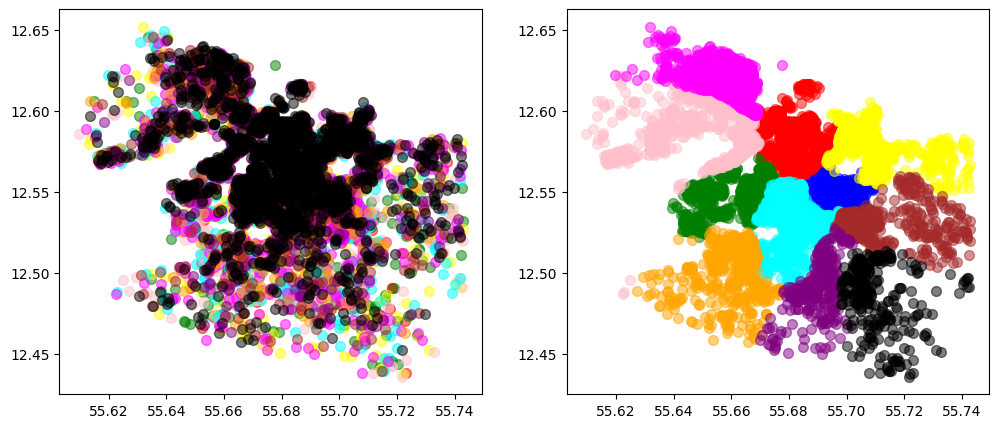

In [246]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_colors = {
    '[0-1000]' : 'blue',
    '[1000-2000]' : 'red',
    '[2000-3000]' : 'green',
    '[3000-4000]' : 'yellow',
    '[4000-5000]' : 'pink',
    '[5000-6000]' : 'cyan',
    '[6000-7000]' : 'magenta',
    '[7000-8000]' : 'orange',
    '[8000-9000]' : 'brown',
    '[9000-10000]' : 'purple',
    ' > 10000' : 'black'
}

neighborhood_colors = {
    'Nørrebro' : 'blue',
    'Indre By' : 'red',
    'Vesterbro-Kongens Enghave' : 'green',
    'Østerbro' : 'yellow',
    'Amager Vest' : 'pink',
    'Frederiksberg' : 'cyan',
    'Amager Øst' : 'magenta',
    'Valby' : 'orange',
    'Bispebjerg' : 'brown',
    'Vanløse' : 'purple',
    'Brønshøj-Husum' : 'black'
}


for category, color in bin_colors.items():
    subset = relevant_listings[relevant_listings['price_bin'] == category]
    ax1.scatter(subset['latitude'], subset['longitude'],
                color=color,
                alpha=0.5,
                marker='o',
                s=50,
                label=category)
    
for category, color in neighborhood_colors.items():
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    ax2.scatter(subset['latitude'], subset['longitude'],
                color=color,
                alpha=0.5,
                marker='o',
                s=50,
                label=category)

## Point 8

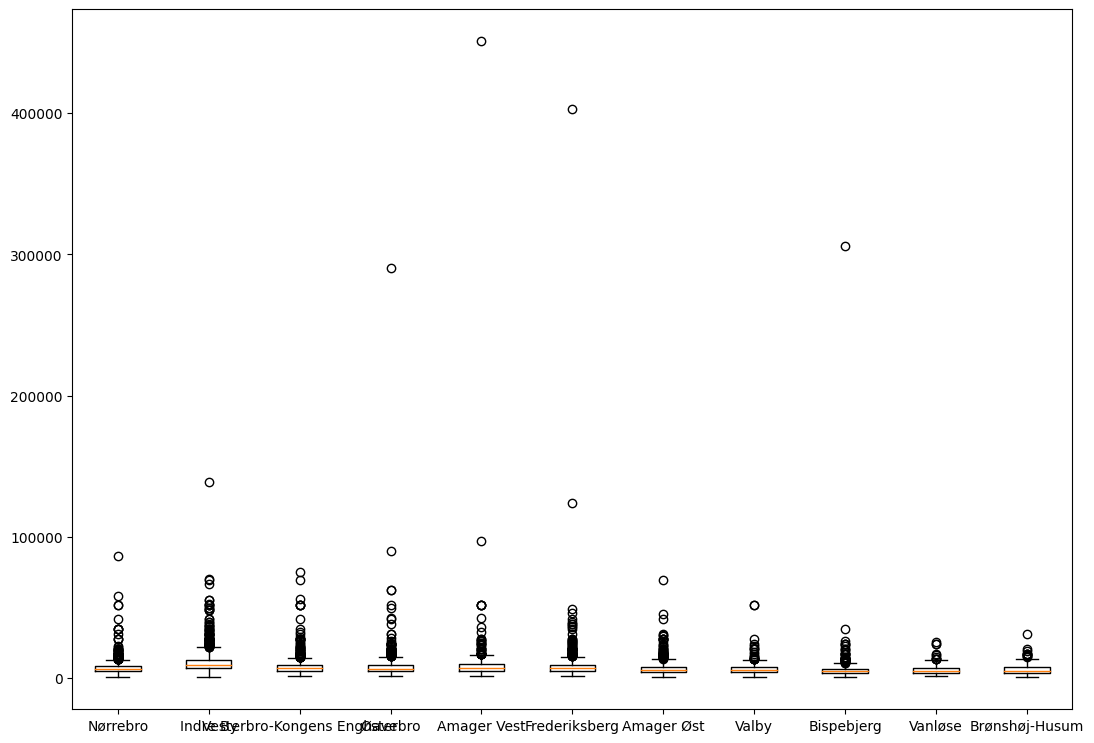

In [247]:
neighborhoods = [
    'Nørrebro',
    'Indre By',
    'Vesterbro-Kongens Enghave',
    'Østerbro',
    'Amager Vest',
    'Frederiksberg',
    'Amager Øst',
    'Valby',
    'Bispebjerg',
    'Vanløse',
    'Brønshøj-Husum'
]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

data = []

for category in neighborhoods:
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    data.append(subset['price'])
    
bp = plt.boxplot(data, labels=neighborhoods)
 
# show plot
plt.show()

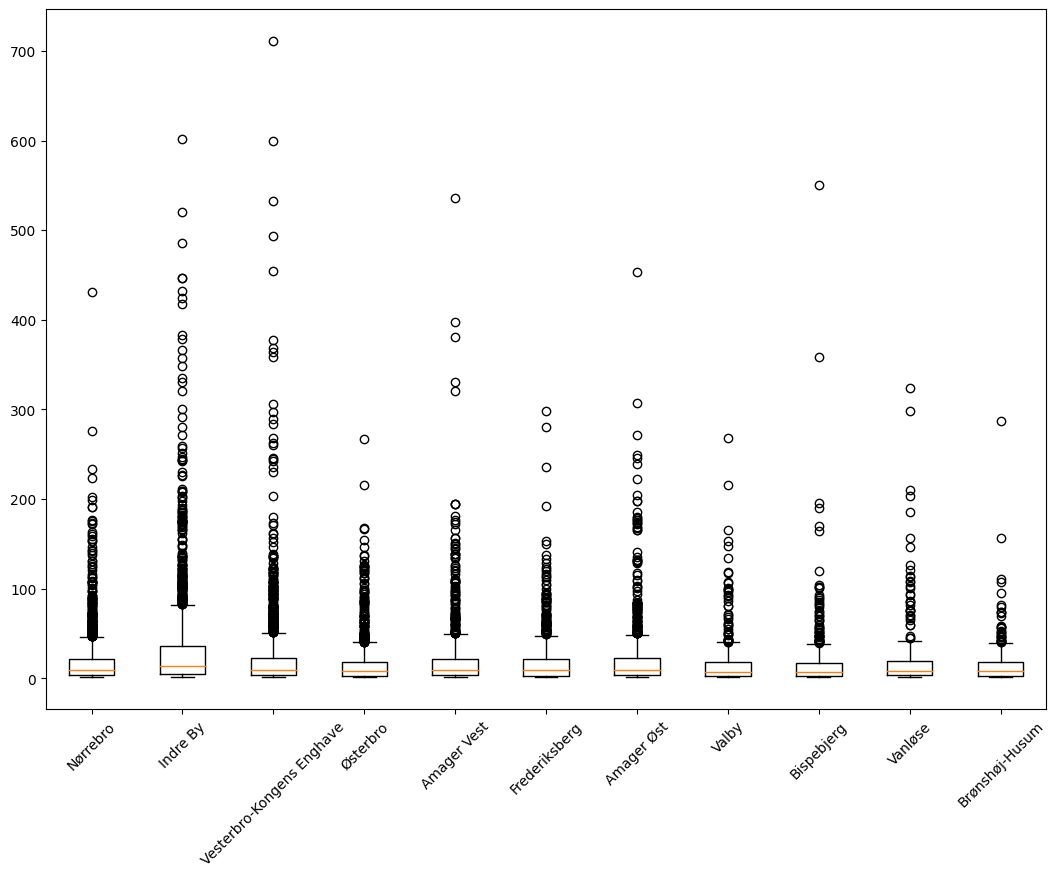

In [248]:
neighborhoods = [
    'Nørrebro',
    'Indre By',
    'Vesterbro-Kongens Enghave',
    'Østerbro',
    'Amager Vest',
    'Frederiksberg',
    'Amager Øst',
    'Valby',
    'Bispebjerg',
    'Vanløse',
    'Brønshøj-Husum'
]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

data = []

for category in neighborhoods:
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    data.append(subset['number_of_reviews'])
    
bp = plt.boxplot(data, labels=neighborhoods)

plt.xticks(rotation=45)
 
# Show plot
plt.show()

## Point 9

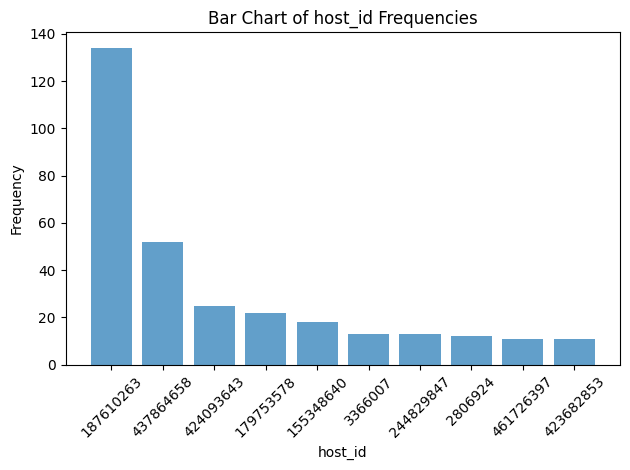

In [249]:
top_10_entries = relevant_listings['host_id'].value_counts().head(10)


x = [str(host_id) for host_id in top_10_entries.index]
y = list(top_10_entries.values)


# Create a bar chart
plt.bar(x, y, align='center', alpha=0.7)

# Add labels and title
plt.xlabel('host_id')
plt.ylabel('Frequency')
plt.title('Bar Chart of host_id Frequencies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()

## Point 10

In [250]:
# Get the needed information of the neighbourhood - room_type and we chose price and review_scores_rating
neighborhood_info = relevant_listings[['neighbourhood_cleansed', 'room_type', 'price', 'review_scores_rating']]

# Display the descriptive analysis
neighborhood_info.describe(include='all')

,neighbourhood_cleansed,room_type,price,review_scores_rating
count,12126,12126,12126.000000,12126.000000
unique,11,4,NaN,NaN
top,Nørrebro,Entire home/apt,NaN,NaN
freq,2057,10748,NaN,NaN
mean,NaN,NaN,8030.411488,4.804020
std,NaN,NaN,8594.828764,0.283435
min,NaN,NaN,549.050000,0.000000
25%,NaN,NaN,5010.950000,4.710000
50%,NaN,NaN,6804.050000,4.890000
75%,NaN,NaN,9236.550000,5.000000


## Point 11

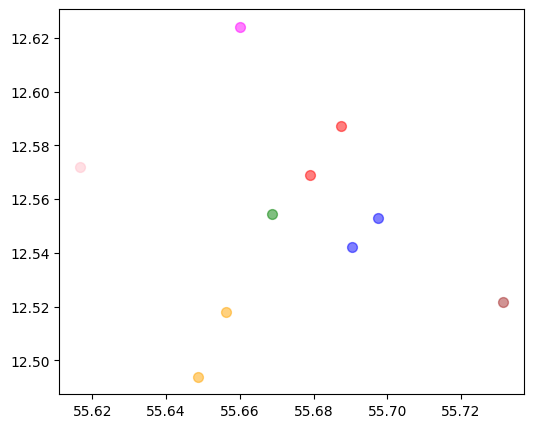

In [251]:
# Get the top 10 apartments with highest ratings
top10_ratings = relevant_listings.sort_values(by='review_scores_rating', ascending=False).head(10)

fig = plt.subplots(1, figsize=(6, 5))
# Different colors for different neighborhoods

neighborhood_colors = {
    'Nørrebro' : 'blue',
    'Indre By' : 'red',
    'Vesterbro-Kongens Enghave' : 'green',
    'Østerbro' : 'yellow',
    'Amager Vest' : 'pink',
    'Frederiksberg' : 'cyan',
    'Amager Øst' : 'magenta',
    'Valby' : 'orange',
    'Bispebjerg' : 'brown',
    'Vanløse' : 'purple',
    'Brønshøj-Husum' : 'black'
}

 # Plot   
for category, color in neighborhood_colors.items():
    subset = top10_ratings[top10_ratings['neighbourhood_cleansed'] == category]
    plt.scatter(subset['latitude'], subset['longitude'],
                color=color,
                alpha=0.5,
                marker='o',
                s=50,
                label=category)


## Point 12

In [252]:
# Remove some fields
relevant_listings = relevant_listings.drop(['host_name', "name", "price_bin", "last_review", "calculated_host_listings_count"], axis='columns')

# Dummy data - make the text data into numeric data
mapping_neighbourhood = {}
mapping_room_type = {}

# Get a list of all neighbourhoods
neighborhood_list = relevant_listings['neighbourhood_cleansed'].unique().tolist()
item_number = 0
# Give each neighbourhood a coresponding number
for neighborhood in neighborhood_list:
    mapping_neighbourhood[neighborhood] = item_number
    item_number += 1

# Get a list of all room_types
room_type_list = relevant_listings['room_type'].unique().tolist()
item_number = 0
# Give each room_type a coresponding number
for room_type in room_type_list:
    mapping_room_type[room_type] = item_number
    item_number += 1

# Map the neighbourhoods and the room_types to their coresponding numbers
relevant_listings['neighbourhood_cleansed'] = relevant_listings['neighbourhood_cleansed'].map(mapping_neighbourhood)
relevant_listings['room_type'] = relevant_listings['room_type'].map(mapping_room_type)
relevant_listings

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,availability_365
0,6983,16774,0,55.686410,12.547410,0,6241.10,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,0
1,26057,109777,1,55.693070,12.576490,0,18070.00,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,303
2,26473,112210,1,55.676020,12.575400,0,22587.50,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,56
3,29118,125230,2,55.670230,12.555040,0,5038.75,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,59
4,31094,129976,2,55.666602,12.555283,0,13580.30,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,54229471,10,55.739028,12.487433,0,5949.20,6,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,0
13809,646941499450912133,141288846,8,55.730481,12.521243,0,7297.50,2,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,0
13811,647809303952891559,4862421,7,55.667782,12.463285,0,3127.50,3,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,0
13812,650819220455514228,134647873,7,55.659536,12.474726,0,2780.00,1,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,0


## Point 13

In [253]:
# Get the meadian of the prices of the apartments
median = relevant_listings['price'].median()

# Create new column  for the affordability of the apartments
# If the price is higher than the median, then the apartment is expensive and denoted as 1 in the column
# If the price is less than the median, then it is affordable and denoted as 0
relevant_listings['price_affordability'] = relevant_listings['price'].apply(lambda x: 1 if x > median else 0)
relevant_listings

,id,host_id,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,availability_365,price_affordability
0,6983,16774,0,55.686410,12.547410,0,6241.10,3,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,0,0
1,26057,109777,1,55.693070,12.576490,0,18070.00,4,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,303,1
2,26473,112210,1,55.676020,12.575400,0,22587.50,3,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,56,1
3,29118,125230,2,55.670230,12.555040,0,5038.75,7,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,59,0
4,31094,129976,2,55.666602,12.555283,0,13580.30,3,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,54229471,10,55.739028,12.487433,0,5949.20,6,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,0,0
13809,646941499450912133,141288846,8,55.730481,12.521243,0,7297.50,2,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,0,1
13811,647809303952891559,4862421,7,55.667782,12.463285,0,3127.50,3,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,0,0
13812,650819220455514228,134647873,7,55.659536,12.474726,0,2780.00,1,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,0,0


## Point 14 - Naive Bayes Model

In [254]:
from sklearn.naive_bayes import GaussianNB

# Get the labels
labels = relevant_listings['price_affordability']
# Drop the label column from the data
relevant_listings = relevant_listings.drop(['price_affordability'], axis='columns')

# Separate the data into test and train
train_data, test_data, train_labels, test_labels = train_test_split(relevant_listings, labels, train_size=0.80, test_size=0.20, random_state=0)
print("Number of data points in training set and test set, respectively: {} and {}".format(train_data.shape[0], test_data.shape[0]))

# Naïve Bayers
gaussian = GaussianNB()

#Train
gaussian.fit(train_data, train_labels)

#Display the accuracy using test data
print("Gaussian model accuracy on the original data: {}".format(gaussian.score(test_data,test_labels)))

Number of data points in training set and test set, respectively: 9700 and 2426
Gaussian model accuracy on the original data: 0.5259686727122836


## Point 14 - K Nearest Neighbors

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Separate the data into test and train
train_data, test_data, train_labels, test_labels = train_test_split(relevant_listings, labels, train_size=0.80, test_size=0.20, random_state=0)
print("Number of data points in training set and test set, respectively: {} and {}".format(train_data.shape[0], test_data.shape[0]))

# K-nearest neighbour - using 7 neighbours
knn = KNeighborsClassifier(n_neighbors=7)

# Train
knn.fit(train_data, train_labels)

#Display the accuracy using test data
print("K Nearest Neighbors model accuracy on the original data: {}".format(knn.score(test_data,test_labels)))

Number of data points in training set and test set, respectively: 9700 and 2426
K Nearest Neighbors model accuracy on the original data: 0.5342126957955482


## Point 15

After performing same data analysis on the Air bnb data set we discovered it necessitated quite a bit of data cleaning.
For example removing 1689 that had missing values.

We also performed some data correction, for example correcting the names of the municipalities and also tried to sanitize the names of the host, while the current solution didn't succeed to find an automatic way to cleanse the names completely and accurately, it performed well enough.

Plotting the box-plots have demonstrated that the price column of the data set contains a few outliers which could affect the outcomes of the models.

We also saw how to create some visualizations using the matplotlib library.

A dummy variable was use to classify each listing based on the price into either "expensive" or "affordable".

Finally 2 models have been built one Naive Bayes and another K Nearest Neighbor which showed a similar accuracy of ±0.52. Nontheless, the KNN give higher accuracy after tunign the n_neighbor parameter - it seems n_neighbor = 7 gives the highest score for data set - 0.5342126957955482.
Further improvement could be done, for example by using data imputation on the models to deal with the outliers. An other improvement could be to separate the data into train (70%), test(20%) and validate(10%).